## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 15})

In [19]:
def plot_eq(state,t_desired):
    fig = plt.figure(figsize = (18,8) )
    fig.suptitle(state+" equilibration phase", fontsize = (22))

    N,temp_ist,temp_ave = np.loadtxt("../c++/es 4/NSL_SIMULATOR/OUTPUT/"+state+"/temperature_eq.dat", usecols=(0,1,2), unpack = 'true')
    x = np.arange(N[-1])

    plt.plot(N,temp_ist, label = "instant temperature", color = "blue")
    plt.plot(N,temp_ave, label = "cumulative_average temperature", color = "orange", ls="--")
    plt.xlabel("steps")
    plt.ylabel("T*")
    plt.hlines(t_desired ,0 ,N[-1], color = "red", label = "desired value", linewidth=2.5) 
    plt.grid()
    plt.legend()

    plt.show()

In [25]:
def plot_ave(state,t_desired):
    N = 30 #blocchi da 10k steps
    x = np.linspace(0,N,N)
    fig, axs = plt.subplots(3,2, figsize = (15,18) )
    fig.suptitle(state+" simulation after equilibration phase", fontsize = (22))

    press, error_press = np.loadtxt("../c++/es 4/NSL_SIMULATOR/OUTPUT/"+state+"/pressure.dat",         usecols=(2,3), unpack = 'true')
    ekin, error_ekin   = np.loadtxt("../c++/es 4/NSL_SIMULATOR/OUTPUT/"+state+"/kinetic_energy.dat",   usecols=(2,3), unpack = 'true')
    pot, error_pot     = np.loadtxt("../c++/es 4/NSL_SIMULATOR/OUTPUT/"+state+"/potential_energy.dat", usecols=(2,3), unpack = 'true')
    etot, error_etot   = np.loadtxt("../c++/es 4/NSL_SIMULATOR/OUTPUT/"+state+"/total_energy.dat",     usecols=(2,3), unpack = 'true')
    temp, error_temp   = np.loadtxt("../c++/es 4/NSL_SIMULATOR/OUTPUT/"+state+"/temperature.dat",      usecols=(2,3), unpack = 'true')

    plt.subplot(3,2,1)
    plt.errorbar(x,press,yerr=error_press, label = "simulation", color = "blue")
    plt.title("Pressure")
    plt.xlabel("blocks")
    plt.ylabel("P*")
    plt.hlines(press[-1] ,0 ,N, color = "red" , label = "last block value") 
    plt.grid(True)

    plt.subplot(3,2,2)
    plt.errorbar(x,ekin,yerr=error_ekin, color = "blue")
    plt.title("Kinetic energy")
    plt.xlabel("blocks")
    plt.ylabel("K*")
    plt.hlines(ekin[-1] ,0 ,N, color = "red" )
    plt.grid(True)

    plt.subplot(3,2,3)
    plt.errorbar(x,pot,yerr=error_pot, color = "blue")
    plt.title("Potential energy")
    plt.xlabel("blocks")
    plt.ylabel("V*")
    plt.hlines(pot[-1] ,0 ,N, color = "red" ) 
    plt.grid(True)

    plt.subplot(3,2,4)
    plt.errorbar(x,etot,yerr=error_etot, color = "blue" )
    plt.title("Total energy")
    plt.xlabel("blocks")
    plt.ylabel("E*")
    plt.hlines(etot[-1] ,0 ,N, color = "red" ) 
    plt.grid(True)

    plt.subplot(3,2,5)
    plt.errorbar(x,temp,yerr=error_temp, color = "blue" )
    plt.title("Temperature")
    plt.xlabel("blocks")
    plt.ylabel("T*")
    plt.hlines(temp[-1] ,0 ,N, color = "red") 
    plt.hlines(t_desired ,0 ,N, color = "orange", label = "desired temperature" ) 
    plt.grid(True)

    plt.subplot(3,2,6)
    plt.axis("off")
    plt.subplots_adjust(wspace=0.3, hspace=0.3)


    fig.legend( fontsize = 15)

    plt.show()

### SOLID PHASE

For the equilibration phase i started a simulation for 10000 blocks with 1 steps each starting from a temperature T*=1.542. It's possible to see that after about 1000 steps we have the equilibration. So we need to start the simulation from an higher temperature to reach our "goal temperature" (in solid case we want to reach T*=0.8). 

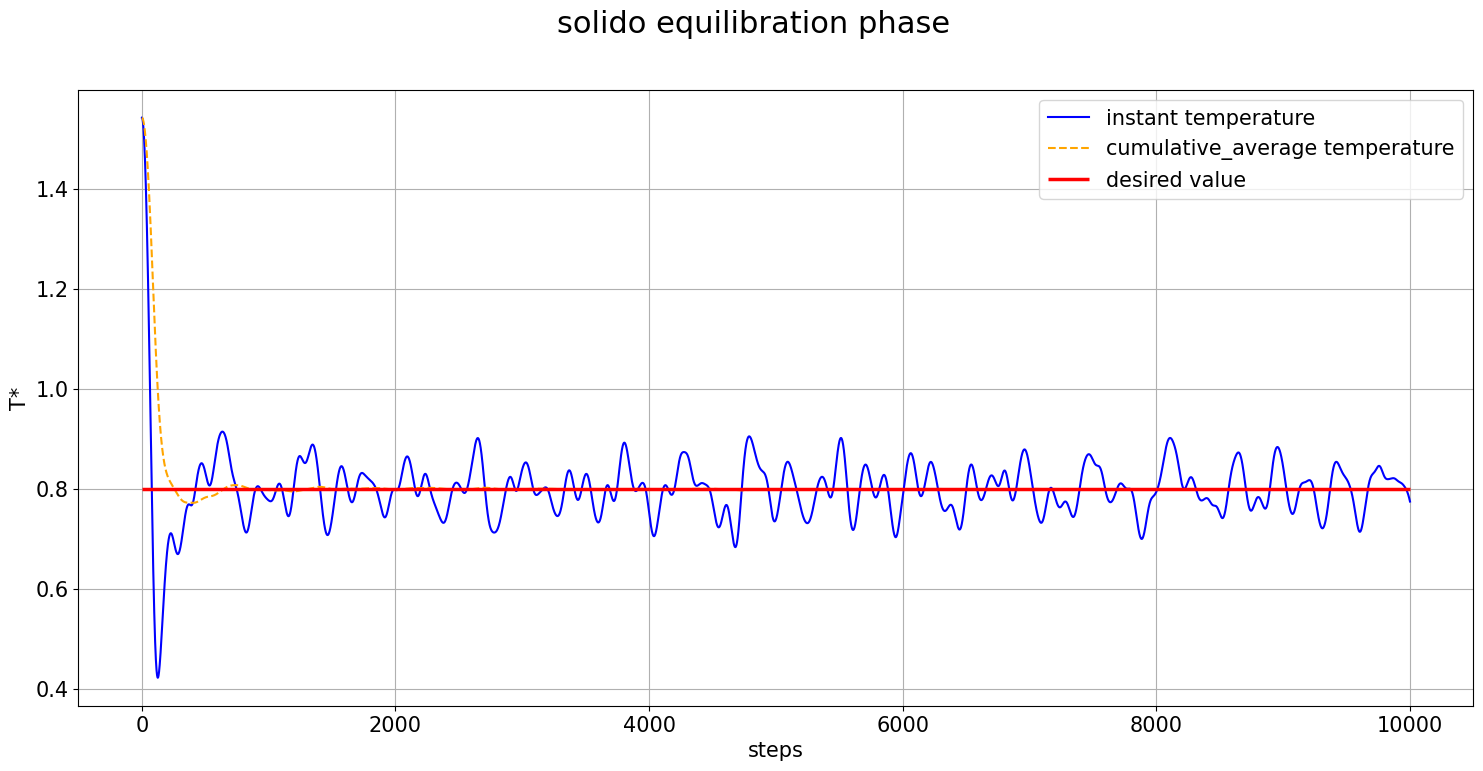

In [26]:
plot_eq("solido",0.8)

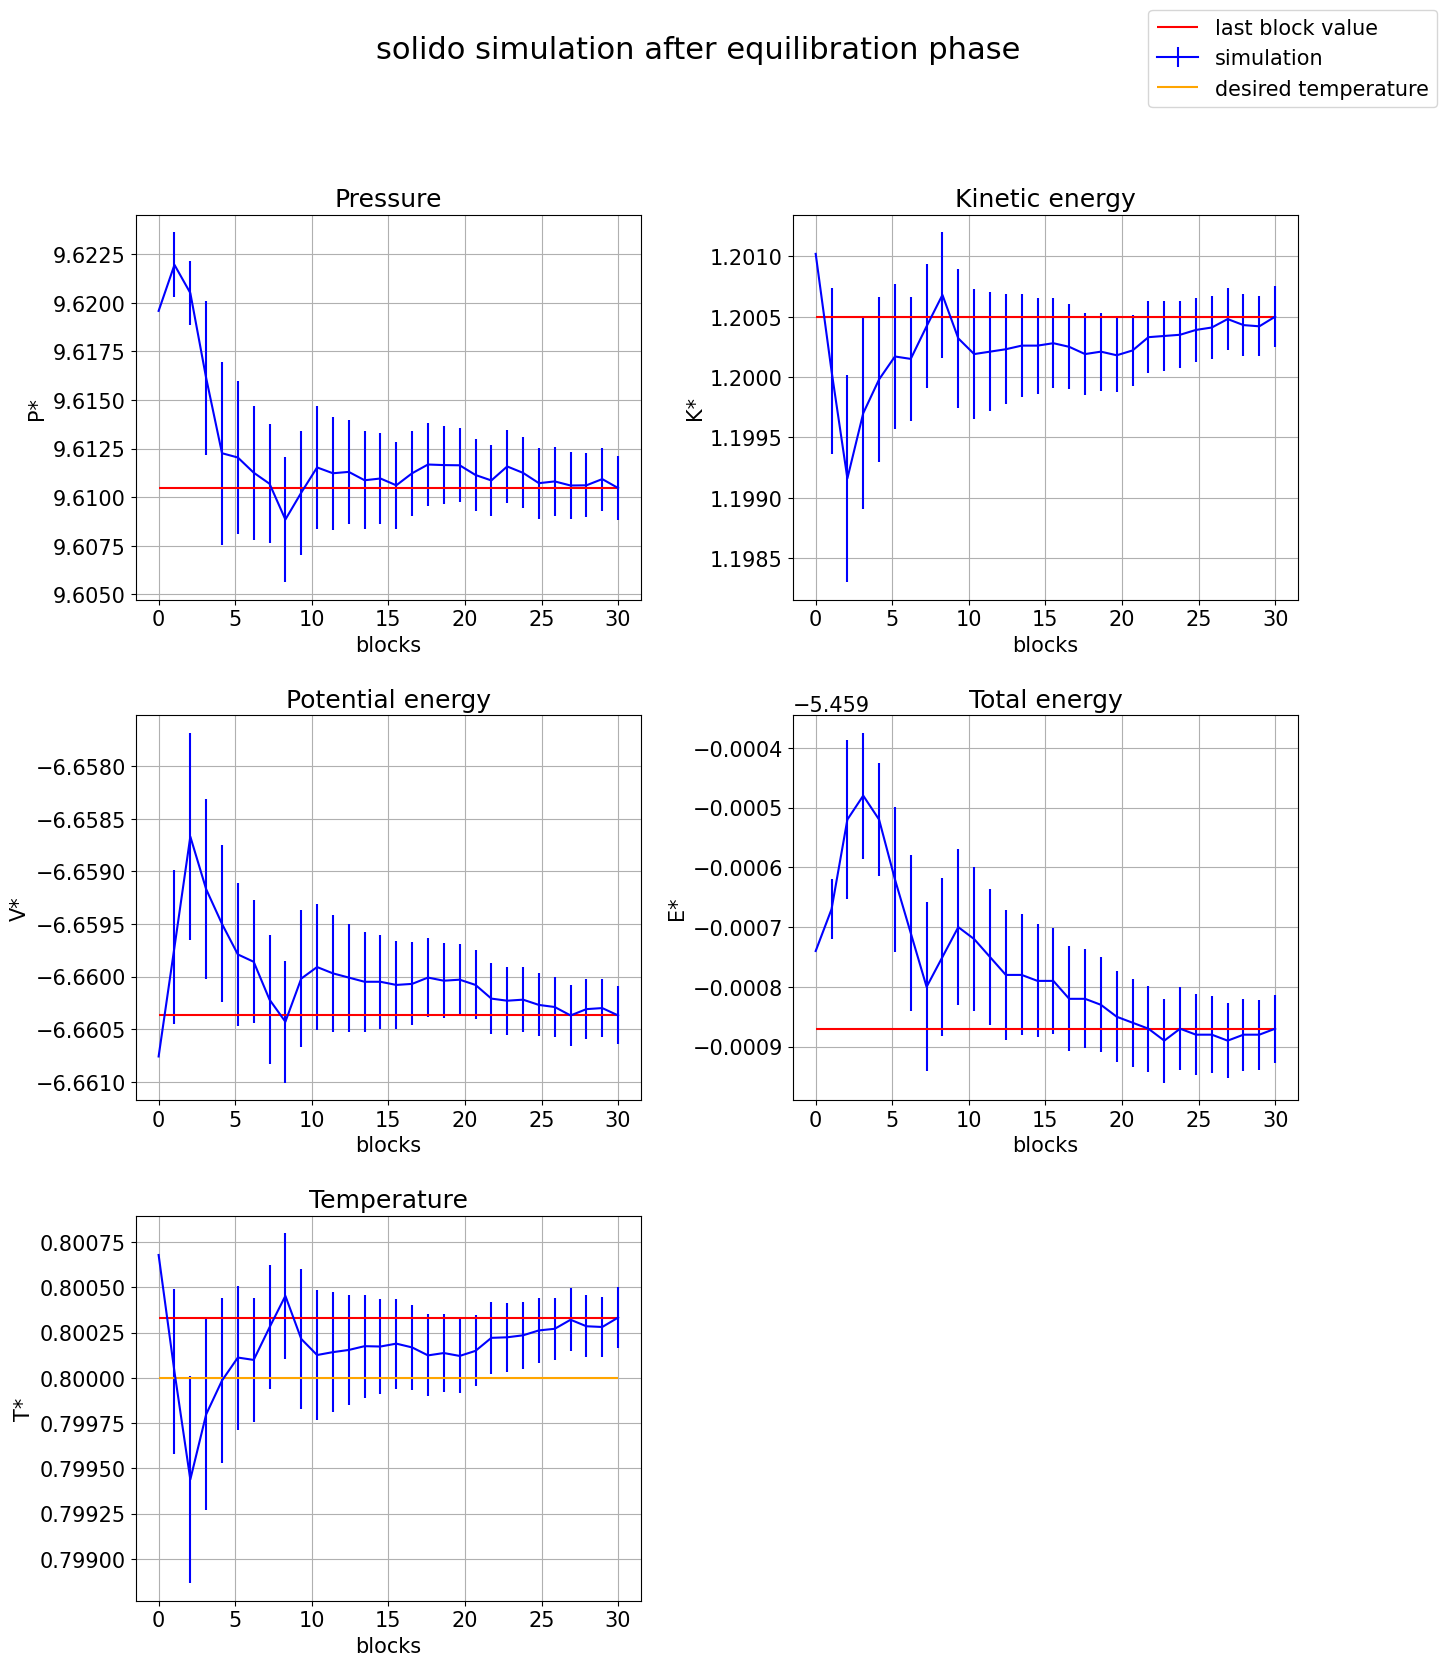

In [27]:
plot_ave("solido",0.8)

### LIQUID PHASE

For the equilibration phase i started a simulation for 10000 blocks with 1 steps each starting from a temperature T*=1.98. It's possible to see that after about 1000 steps we have the equilibration. So we need to start the simulation from an higher temperature to reach our "goal temperature" (in liquid case we want to reach T*=1.1). 

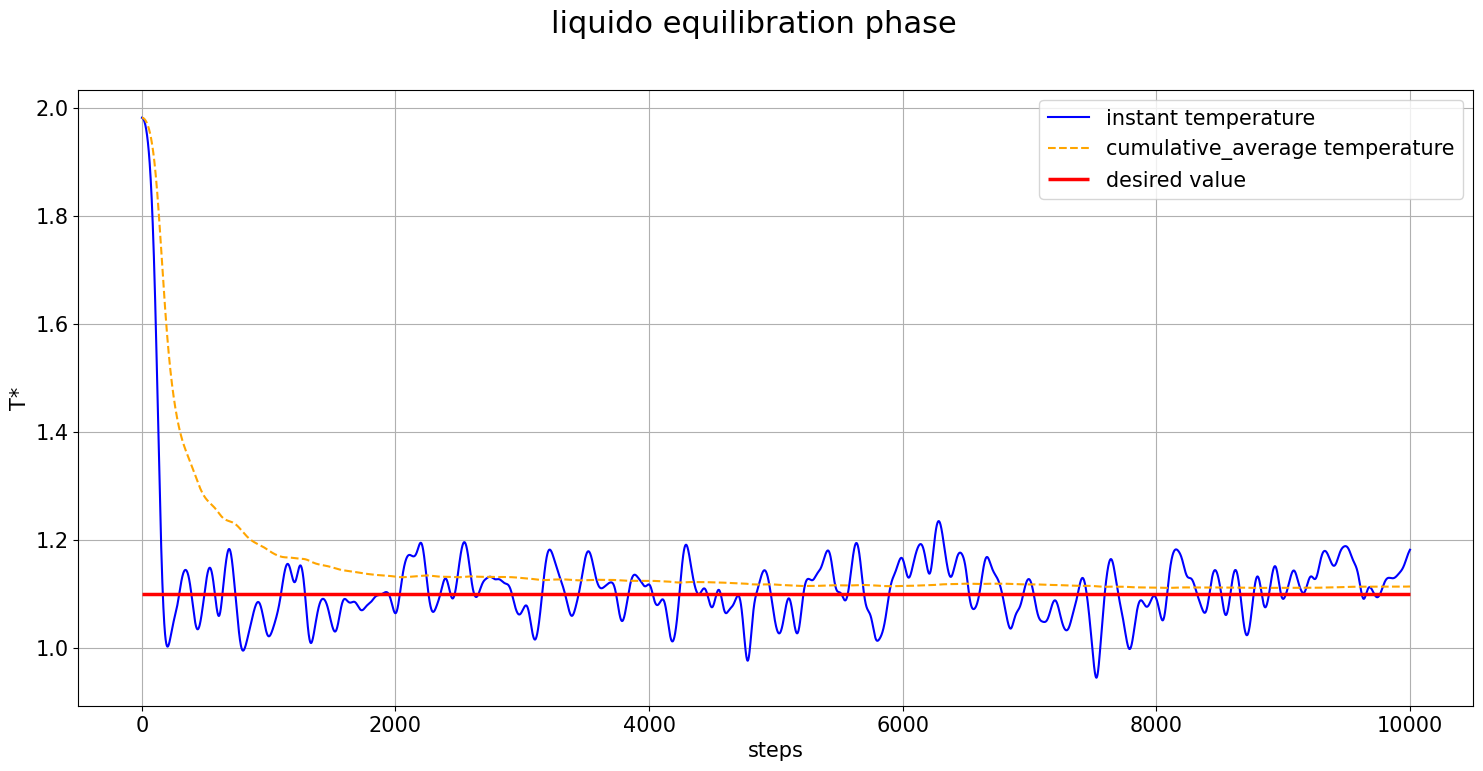

In [28]:
plot_eq("liquido",1.1)

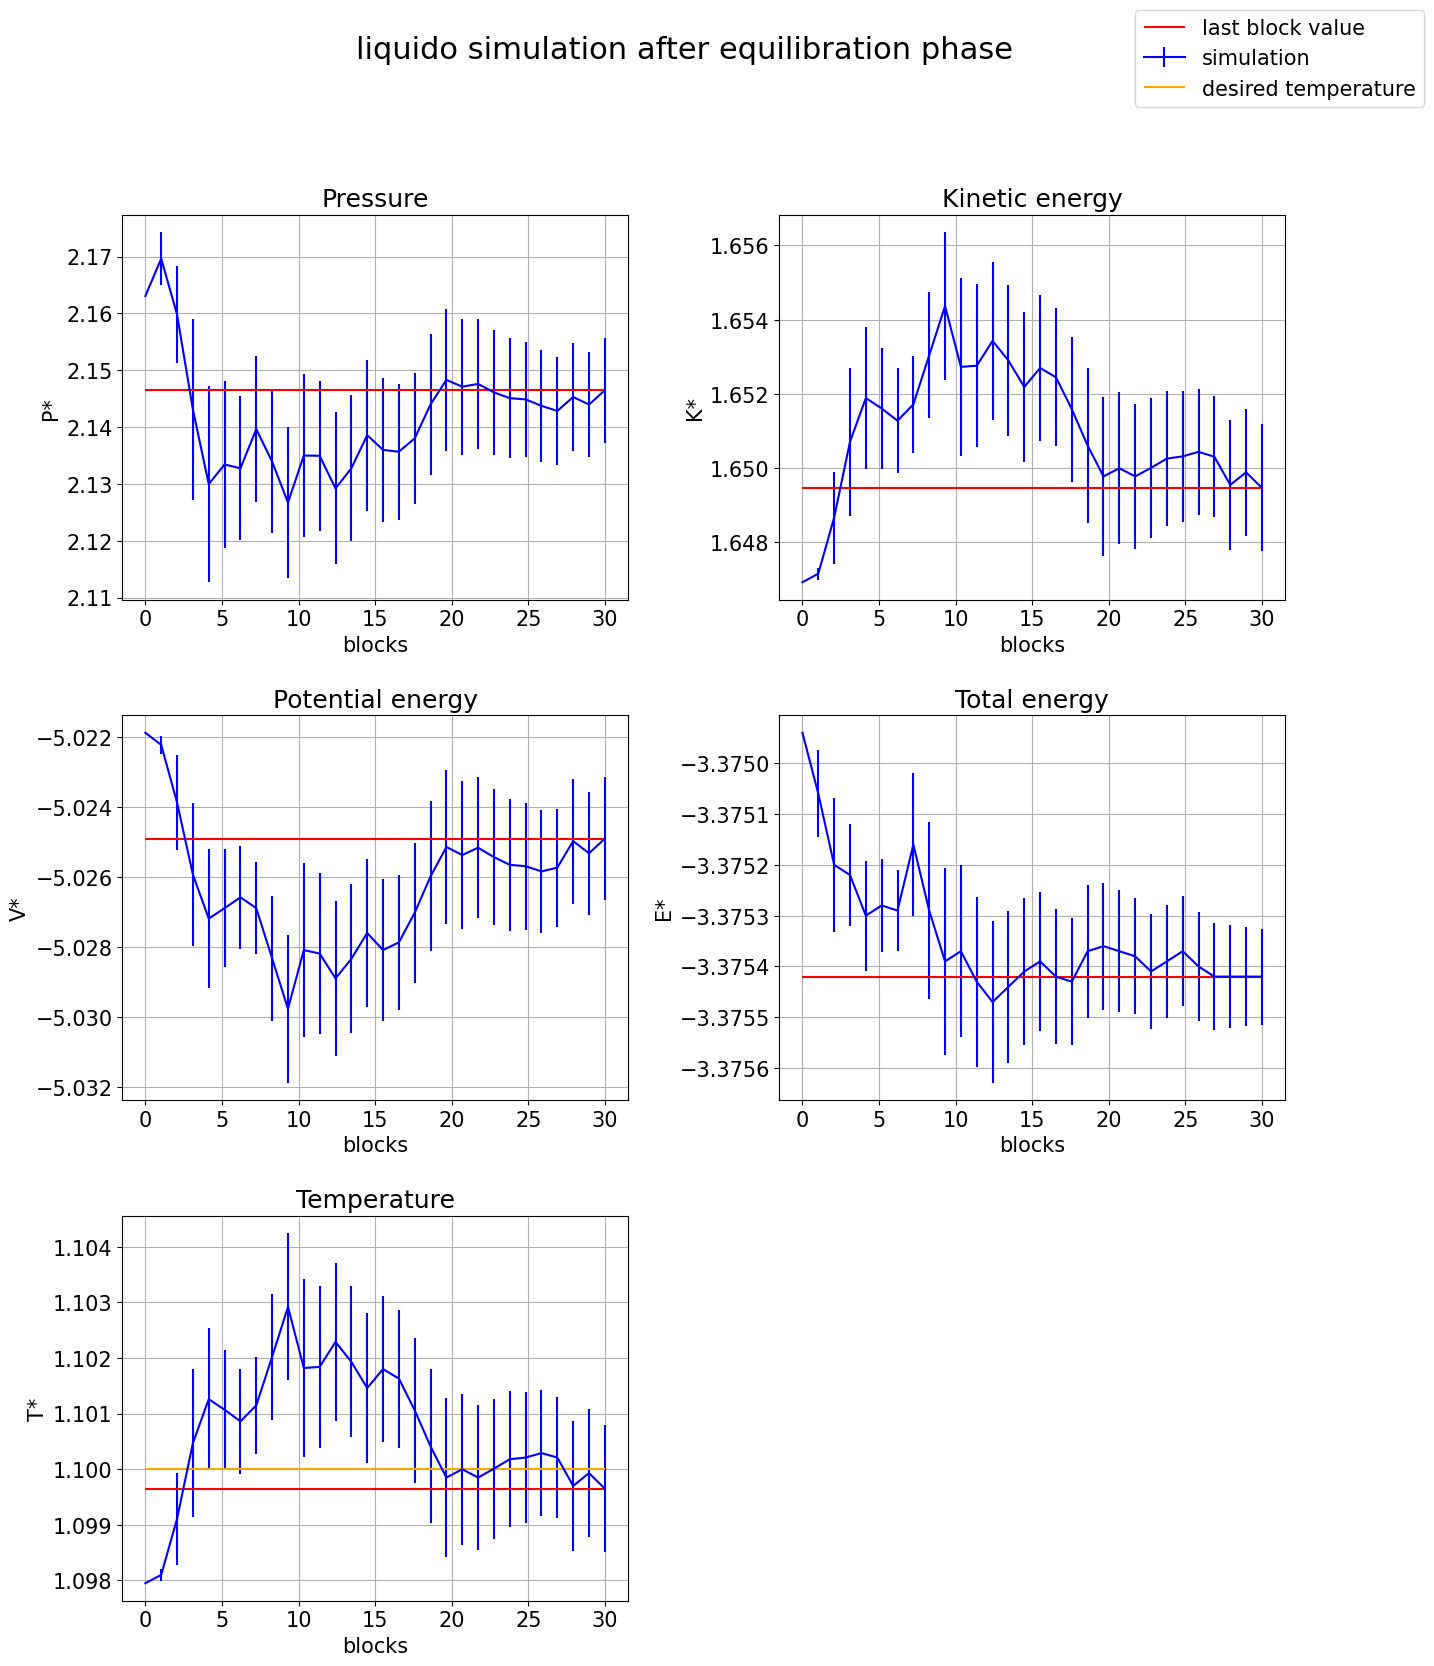

In [29]:
plot_ave("liquido",1.1)

### GAS PHASE

For the equilibration phase i started a simulation for 10000 blocks with 1 steps each starting from a temperature T*=0.96

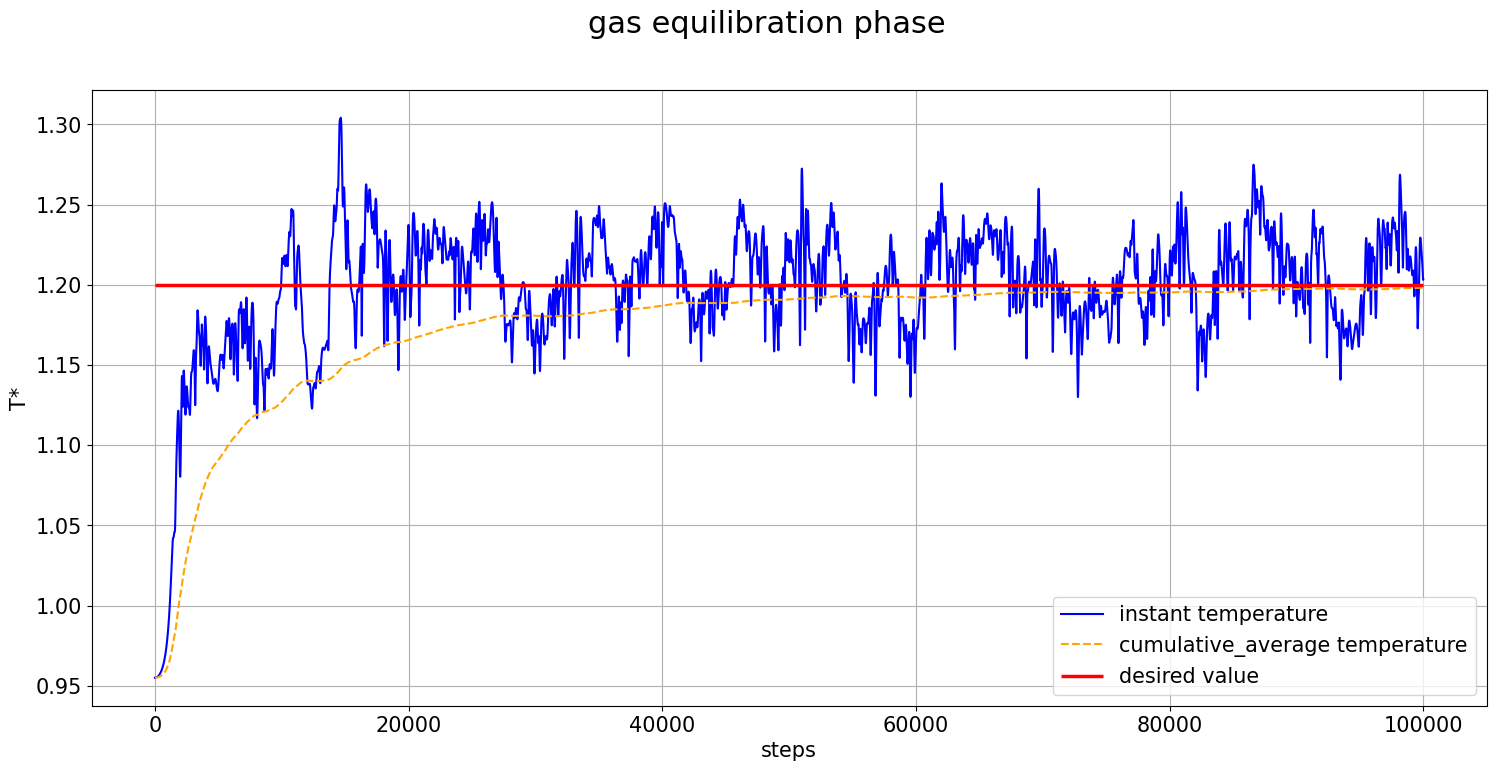

In [30]:
plot_eq("gas",1.2)

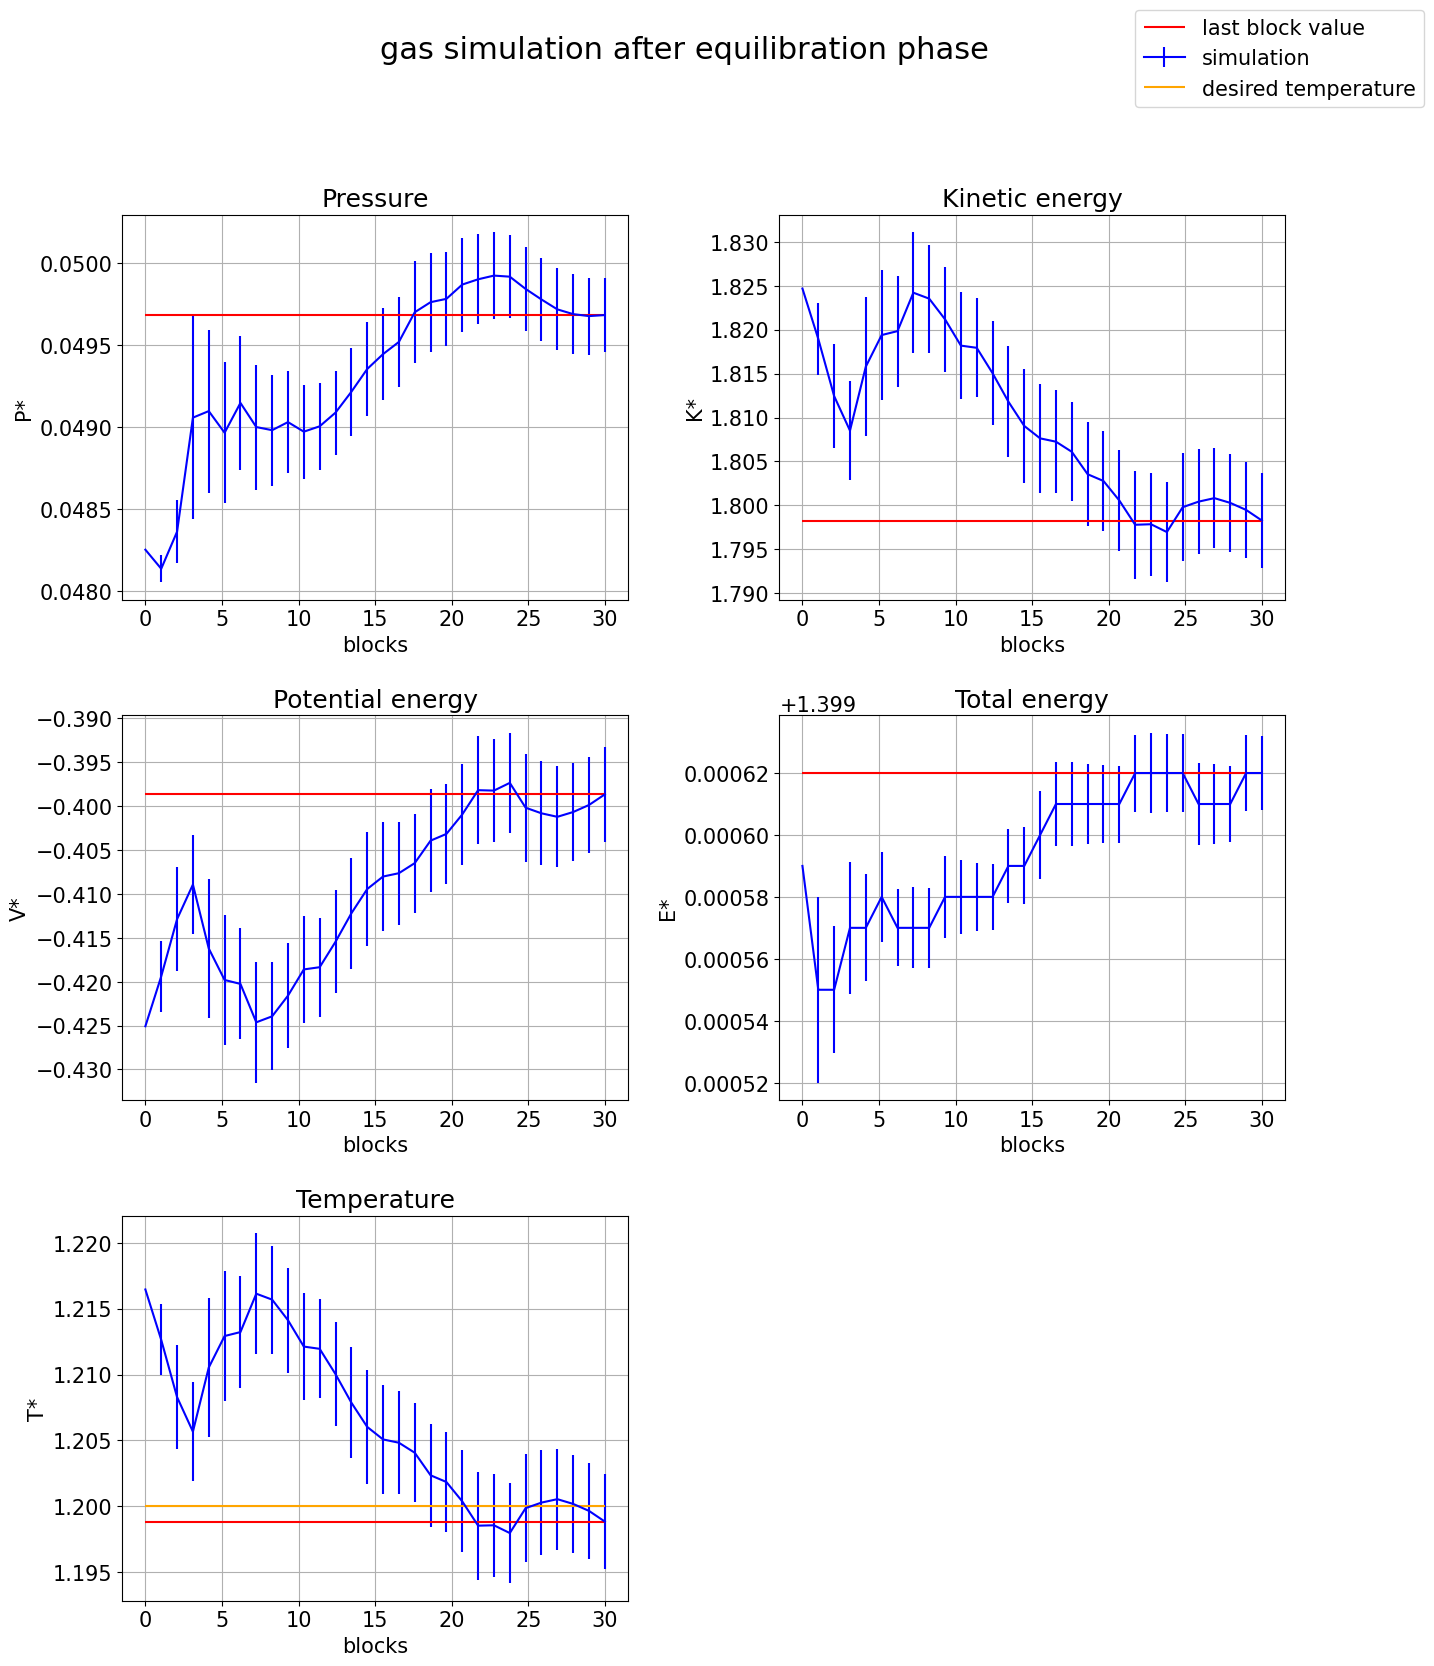

In [31]:
plot_ave("gas",1.2)